In [ ]:
import pandas as pd

In [ ]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction


Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 61.1MB/s]


In [ ]:
!unzip bank-customer-churn-prediction.zip -d df


Archive:  bank-customer-churn-prediction.zip
  inflating: df/Churn_Modelling.csv  


In [ ]:
df = pd.read_csv('df/Churn_Modelling.csv')

In [ ]:
df.isnull().sum()  # Check for missing values


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


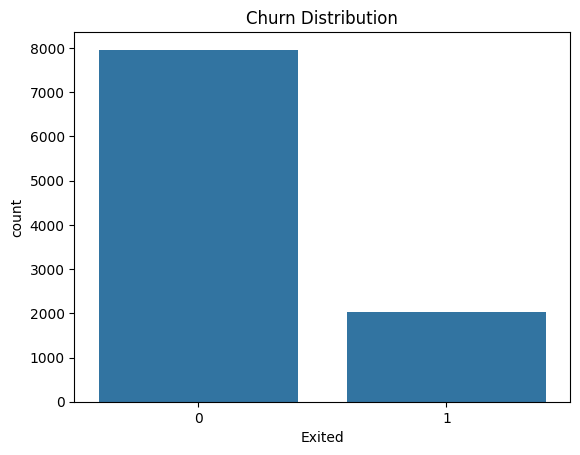

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Exited'])  # 'Exited' is the churn column (0 = Not Churned, 1 = Churned)
plt.title("Churn Distribution")
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2151,753,57,7,0.00,1,1,0,159475.08,False,False,True
8392,739,32,3,102128.27,1,1,0,63981.37,True,False,True
5006,755,37,0,113865.23,2,1,1,117396.25,True,False,False
4117,561,37,5,0.00,2,1,0,83093.25,False,False,True
7182,692,49,6,110540.43,2,0,1,107472.99,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4555,688,35,6,0.00,1,1,0,25488.43,False,True,False
4644,712,74,5,0.00,2,0,0,151425.82,False,True,True
8942,667,37,9,71786.90,2,1,1,67734.79,False,False,False
2935,687,35,8,100988.39,2,1,0,22247.27,False,True,True


In [ ]:
df.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64
Geography_Germany,bool


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.809

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Confusion Matrix:
 [[1543   50]
 [ 332   75]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8645

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Model Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.864

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.49      0.60       407

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [ ]:
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
}

print("Model Comparison:", models)


Model Comparison: {'Logistic Regression': 0.809, 'Random Forest': 0.8645, 'XGBoost': 0.864}
